In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x = np.arange(1000)
np.random.shuffle(x)
x = x.reshape((1000,1))
y = np.arange(1000)
np.random.shuffle(y)
y = y.reshape((1000,1))
z = np.arange(1000)
np.random.shuffle(z)
z = z.reshape((1000,1))
target = 5*x-3*y+2*z+1

feature = np.hstack((np.hstack((x,y)),z))/100
feature = feature.reshape(1000,3)
target = target.reshape(1000,1)/100

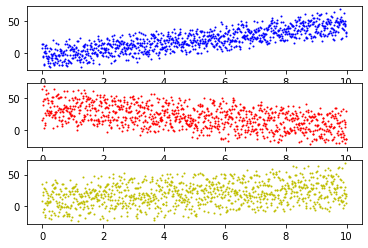

In [3]:
%matplotlib inline
data = np.transpose(feature)

fig, axs = plt.subplots(3)

p1 = axs[0].scatter(data[0], target, c='b', s=1)
p2 = axs[1].scatter(data[1], target, c='r', s=1)
p3 = axs[2].scatter(data[2], target, c='y', s=1)
plt.show()

In [4]:
tr_images, tr_labels, te_images, te_labels = feature[:800], target[:800], feature[800:], target[800:]

In [5]:
X = tf.placeholder(tf.float32, shape=(None, 3), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [6]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, 10, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, 10, name="hidden2", activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, 10, name="hidden3", activation=tf.nn.relu)
    hidden4 = tf.layers.dense(hidden3, 10, name="hidden4", activation=tf.nn.relu)
    output = tf.layers.dense(hidden4, 1, name="output")

In [7]:
with tf.name_scope("loss"):
    loss = tf.sqrt(tf.reduce_mean(tf.squared_difference(output, y), name="loss"))

In [8]:
learning_rate = 0.01

In [9]:
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [10]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [11]:
n_epochs = 100
batch_size = 5
min_loss = 0.1

In [12]:
def batch(X, y, batch_size):
    idx = np.arange(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [13]:
with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state('./simple_NN')
    if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
        saver.restore(sess, ckpt.model_checkpoint_path)
        hypo = sess.run([output], feed_dict={X:te_images})
    else:
        sess.run(init)
    for epoch in range(n_epochs):
        for X_batch, y_batch in batch(tr_images, tr_labels, batch_size):
            loss_, _ = sess.run([loss, training_op], feed_dict={X: X_batch, y: y_batch})
        
        if loss_ < min_loss:
            best_epoch = epoch
            break
        if epoch % 10 == 0:
            print(epoch, "loss", loss_)
    
    save_path = saver.save(sess, "./simple_NN/simple_NN01.ckpt")
    writer = tf.summary.FileWriter("./simple_NN/simple_NN01logs", sess.graph)
        

INFO:tensorflow:Restoring parameters from ./simple_NN/simple_NN01.ckpt
0 loss 1.787646
10 loss 1.9348354
20 loss 2.430297
30 loss 0.94619524
40 loss 1.2549638
50 loss 0.8114374
60 loss 0.81158626
70 loss 2.2025223
80 loss 1.0902598
90 loss 0.7314635


In [14]:
np.savetxt("./simple_NN_tr_images.csv",tr_images,delimiter=',')
np.savetxt("./simple_NN_tr_labels.csv",tr_labels,delimiter=',')
np.savetxt("./simple_NN_te_images.csv",te_images,delimiter=',')
np.savetxt("./simple_NN_te_labels.csv",te_labels,delimiter=',')

In [15]:
print(hypo)

[array([[ 1.5511208e+01],
       [ 1.7552324e+01],
       [ 2.9683647e+01],
       [ 1.3583431e+00],
       [ 1.7552324e+01],
       [ 9.4259062e+00],
       [ 3.1128603e+01],
       [-1.7721115e+01],
       [ 1.6668011e+01],
       [ 1.6473806e+01],
       [ 2.4852829e+00],
       [ 1.7552324e+01],
       [ 1.5603697e+01],
       [ 2.6939383e+01],
       [-2.4972901e+00],
       [ 3.2381657e+01],
       [ 1.0927248e+00],
       [ 1.7552324e+01],
       [-4.2861104e+00],
       [ 2.3433752e+01],
       [ 2.0833317e+01],
       [ 2.2752832e+01],
       [ 1.7552324e+01],
       [ 2.4045843e+01],
       [ 1.2467264e+01],
       [ 2.9828381e+01],
       [ 1.7552324e+01],
       [ 1.7552324e+01],
       [ 4.9088264e+00],
       [-1.9033990e+00],
       [ 1.2919469e+00],
       [ 2.8440779e+01],
       [ 2.5681042e+01],
       [ 2.8471991e+01],
       [ 6.9125605e-01],
       [ 1.7552324e+01],
       [ 1.7552324e+01],
       [ 3.7590042e+01],
       [ 2.0958872e+01],
       [ 2.0948612e+01],

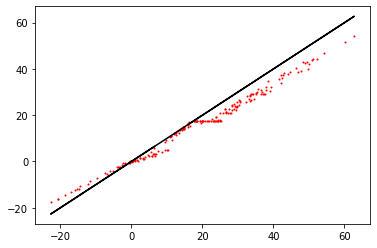

In [16]:
hypo = np.array(hypo).reshape((200,1))
te_labels = np.array(te_labels).reshape((200,1))

plt.plot(te_labels, te_labels, c='k')
plt.scatter(te_labels, hypo, c='r', s=1)
plt.show()